## Exploratory Data Analysis on Predict Futrure Sales 

In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


Load the Data

In [5]:
sales = pd.read_csv("../datasets/predict-future-sales/sales_train.csv")
sales.name = 'sales'
items =  pd.read_csv("../datasets/predict-future-sales/items.csv")
items.name = 'items'
items_cat =  pd.read_csv("../datasets/predict-future-sales/item_categories.csv")
items_cat.name = 'items categories'
shops =  pd.read_csv("../datasets/predict-future-sales/shops.csv")
shops.name = 'shops'
test =  pd.read_csv("../datasets/predict-future-sales/test.csv")
test.name = 'test'
submissions =  pd.read_csv("../datasets/predict-future-sales/sample_submission.csv")
submissions.name = 'submissions' 

Small exploration of the head and shape of each dataframe

In [17]:
racc = [sales, items, items_cat, shops, test, submissions]

for df in racc:
    print("Dimension of ",df.name," is:",df.shape)
    display(df.head())
    print("\n")

Dimension of  sales  is: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0




Dimension of  items  is: (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40




Dimension of  items categories  is: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4




Dimension of  shops  is: (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4




Dimension of  test  is: (214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268




Dimension of  submissions  is: (214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


We can notice that the test set has a different size and shape compared to the sales dataset wich is our training dataframe. By comparing the 2 dataframes we can see that the feature present on the test dataframe are "shop_id" and "item_id" and both of them are in the training one as well. 
Get some basics info about the dataframes

In [14]:
for df in racc:
    print("Info aboout: ", df.name, "\n")
    display(df.info())
    print("-"*50)

Info aboout:  sales 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


None

--------------------------------------------------
Info aboout:  items 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


None

--------------------------------------------------
Info aboout:  items categories 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


None

--------------------------------------------------
Info aboout:  shops 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

--------------------------------------------------
Info aboout:  test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


None

--------------------------------------------------
Info aboout:  submissions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


None

--------------------------------------------------


Search for Empty or null values

In [20]:
for df in racc:
    print("Info aboout empy or nan values in : ", df.name, "\n")
    display(df.isna().sum())
    print("-"*50)

Info aboout empy or nan values in :  sales 



date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  items 



item_name           0
item_id             0
item_category_id    0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  items categories 



item_category_name    0
item_category_id      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  shops 



shop_name    0
shop_id      0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  test 



ID         0
shop_id    0
item_id    0
dtype: int64

--------------------------------------------------
Info aboout empy or nan values in :  submissions 



ID                0
item_cnt_month    0
dtype: int64

--------------------------------------------------


In [22]:
for df in racc:
    print("Columns of: ", df.name, "\n")
    display(df.columns.tolist())
    print("-"*50)

Columns of:  sales 



['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']

--------------------------------------------------
Columns of:  items 



['item_name', 'item_id', 'item_category_id']

--------------------------------------------------
Columns of:  items categories 



['item_category_name', 'item_category_id']

--------------------------------------------------
Columns of:  shops 



['shop_name', 'shop_id']

--------------------------------------------------
Columns of:  test 



['ID', 'shop_id', 'item_id']

--------------------------------------------------
Columns of:  submissions 



['ID', 'item_cnt_month']

--------------------------------------------------


Let's make some adjustments to our data

In [23]:
import datetime
sales['date'] = sales['date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))

We have converted our data to datetime objects

In [24]:
sales['date'].sample(10)

1610976   2014-04-22
2817788   2015-08-09
1226429   2013-12-21
2428400   2015-02-20
1345364   2014-01-14
1862046   2014-07-15
689540    2013-07-29
1997096   2014-09-07
2859196   2015-09-03
12035     2013-01-20
Name: date, dtype: datetime64[ns]

In [28]:
sales['day_of_week'] = sales['date'].apply(lambda x: x.weekday())



With weekday object we have for each date the corresponding day of the week.
Monday = 0 --- Sunday = 6

<AxesSubplot:>

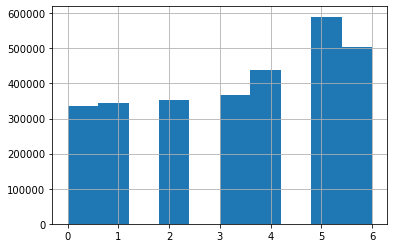

In [40]:
sales.day_of_week.hist()

From the histogram we notice that most sales are made on the weekend.
Let's try to find the months with the most sales.

In [37]:
sales['month_of_year'] = sales['date'].apply(lambda x: x.month)

<AxesSubplot:>

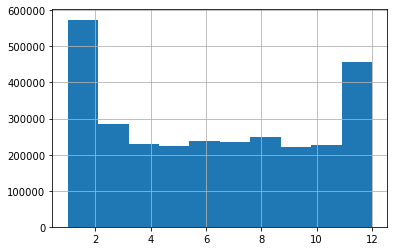

In [41]:
sales.month_of_year.hist()

And the months with the most sales are January and December, we cannot notice any variations on sales during the rest of the year.

In [42]:
sales['year'] = sales['date'].apply(lambda x: x.year)

In [ ]:
sales.year.hist()

And this is the trend of sales year by year. 